<a href="https://colab.research.google.com/github/Rajesh007x/CNN_DataMining/blob/main/CarsVsTrucks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import os, cv2
import numpy as np
import tensorflow as tf
from tensorflow.python import keras

from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, AvgPool2D
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, array_to_img, load_img
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [10]:
data_dir = '/content/drive/MyDrive/Datasets/'

images = []
car_types = []
for car_type in ["car","truck"]:
    car_dir = data_dir + car_type
    car_files = [car_dir + '/' + filename for filename in os.listdir(car_dir)]
    #print(car_files)
    for filename in car_files:
        if filename.endswith('jpg'):
            try:
                images.append(cv2.resize(cv2.imread(filename), (224,224), interpolation=cv2.INTER_CUBIC))
                car_types.append(car_type)
            except Exception as e:
                print(str(e))
            
            
images = np.array(images)
car_types = np.array(car_types)

le = LabelEncoder()
car_types_encoded = le.fit_transform(car_types)
car_types_encoded_onehot = np_utils.to_categorical(car_types_encoded)

OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



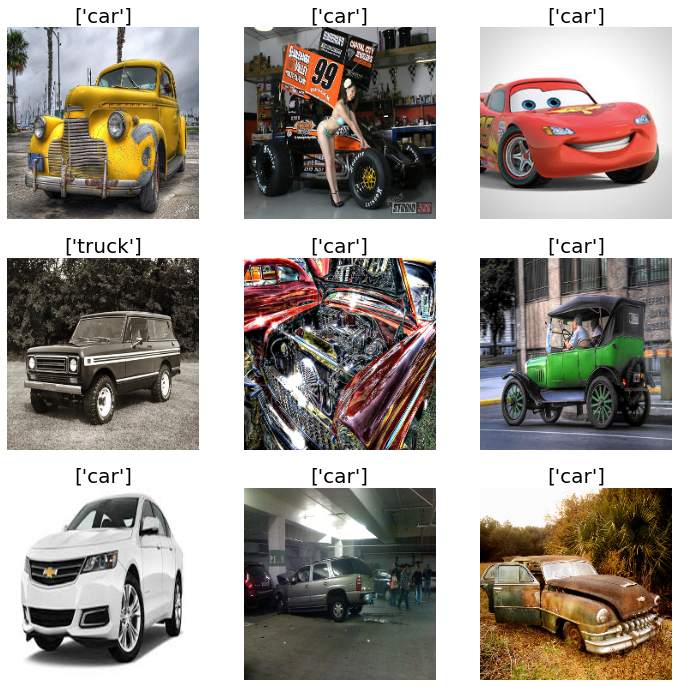

In [18]:
_, ax = plt.subplots(3,3, figsize=(12,12))
for i in range(3):
    for j in range(3):
      ax[i,j].imshow(cv2.cvtColor(images[(i*300)+j], cv2.COLOR_BGR2RGB))
      ax[i,j].axis('off')
      ax[i,j].set_title(le.inverse_transform(car_types_encoded[(i*300)+j]), size = 20)

In [19]:
images, car_types, car_types_encoded = shuffle(images, car_types, car_types_encoded)
car_types_encoded.resize((images.shape[0],1))
print(car_types_encoded.shape)

(788, 1)


In [20]:
model = Sequential()

model.add(Conv2D(32, (3, 3),input_shape=(224, 224, 3),strides = (1,1),  padding = 'same',kernel_initializer='he_normal', activation='relu'))
model.add(BatchNormalization())
model.add(AvgPool2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3),strides = (1,1),  padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3),strides = (1,1),  padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3),strides = (1,1),  padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(units=128, activation='relu', kernel_initializer='normal'))
model.add(Dense(units=2, activation='sigmoid', kernel_initializer='normal'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 224, 224, 32)      128       
_________________________________________________________________
average_pooling2d_1 (Average (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 56, 56, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 28, 28, 32)       

In [14]:
car_types_encoded = car_types_encoded.reshape((images.shape[0],1))
car_types_2class = np.zeros((images.shape[0],2))
for i in range(images.shape[0]):
    if car_types_encoded[i][0] == 0:
        car_types_2class[i][0] = 1
    else:
        car_types_2class[i][1] = 1
#print(car_types_2class[1:100,:])
x_train, x_val, y_train, y_val = train_test_split(images, car_types_2class, test_size=0.2, random_state=0)
x_train = x_train / 255
x_val = x_val / 255

# set train Generator
datagen = ImageDataGenerator(rotation_range=30,width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True)
datagen.fit(x_train)

In [28]:
 def parse_args(args):
  group = parser.add_mutually_exclusive_group()
  parser.add_argument('--steps',            help='Number of steps per epoch.', type=int, default=10000)


In [38]:
# trainning process
nb_epoch = 1
batch_size = 4

fitted_model = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                   # steps_per_epoch = x_train.shape[0],
                   #epochs=nb_epoch,
                   steps_per_epoch = 100,
                   epochs=10,
                    validation_data = (x_val, y_val),
                    )

Epoch 1/10
100/100 [==============================] - 37s 365ms/step - loss: 0.6539 - accuracy: 0.6256 - val_loss: 0.6748 - val_accuracy: 0.5823
Epoch 2/10
100/100 [==============================] - 36s 361ms/step - loss: 0.6619 - accuracy: 0.6156 - val_loss: 0.6992 - val_accuracy: 0.5380
Epoch 3/10
100/100 [==============================] - 36s 361ms/step - loss: 0.6485 - accuracy: 0.6131 - val_loss: 0.8773 - val_accuracy: 0.5633
Epoch 4/10
100/100 [==============================] - 36s 364ms/step - loss: 0.6417 - accuracy: 0.6375 - val_loss: 0.6475 - val_accuracy: 0.6456
Epoch 5/10
100/100 [==============================] - 36s 362ms/step - loss: 0.6483 - accuracy: 0.6206 - val_loss: 0.6674 - val_accuracy: 0.6392
Epoch 6/10
100/100 [==============================] - 36s 364ms/step - loss: 0.6301 - accuracy: 0.6475 - val_loss: 0.6822 - val_accuracy: 0.5759
Epoch 7/10
100/100 [==============================] - 36s 362ms/step - loss: 0.6581 - accuracy: 0.5930 - val_loss: 0.6950 - val_ac

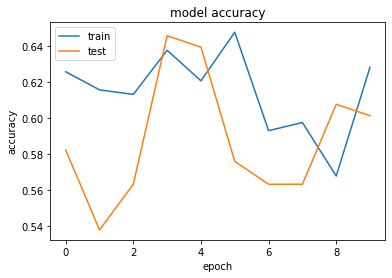

In [39]:
plt.plot(fitted_model.history['accuracy'])
plt.plot(fitted_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show()

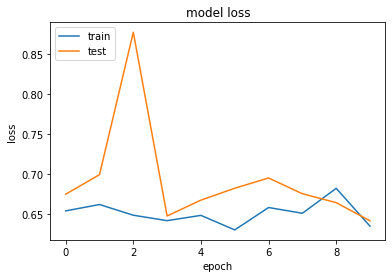

In [40]:
plt.figure()
plt.gcf().clear()
plt.plot(fitted_model.history['loss'])
plt.plot(fitted_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show()